#**Modelo Ising**
#### **Ricardo José Manuel Escobar Matzir**
#### **computational physics**

In this simulation we have assumed $k_B = 1$

##PART ONE: Metropolis Algorithm

We define the functions to define the characteristics of the lattice.

In [ ]:
import numpy as np
import random

def red_random(L):
  "Function that generates a random lattice of size LxL. Enter L as parameter."
  return np.random.choice([-1, 1], size=(L, L))

def red_fria(L):
  "Function that generates a lattice with all spins pointing down. Enter L as parameter."
  return np.ones((L, L))


def energia1(red, J, H):
  "Function that calculates the energy of a given lattice. Enter the lattice as a parameter. J and H"
  size = len(red)
  E_0 = 0
  for i in range(size):
    for j in range(size):
        E_0 += -(J/2)*red[i,j]*(red[(i+1)%size,j] + red[i,(j+1)%size]+red[(i-1)%size,j]+red[i,(j-1)%size]) - H*red[i,j]
  return E_0

def energia(red, J, H):
    size = len(red)
    neighbors = np.roll(red, 1, axis=0) + np.roll(red, -1, axis=0) + np.roll(red, 1, axis=1) + np.roll(red, -1, axis=1)
    energy = -J * np.sum(red * neighbors/2) - H * np.sum(red)
    return energy

def magnetizacion(red):
  "Function that calculates the magnetization of a given lattice. Enter the lattice as a parameter."
  return np.abs(np.sum(red))


 Function that applies the metropolis algorithm to configure a specific lattice, with parameters L, J, H, \\(\beta = 1/T\\)

In [ ]:
def metropolis(L, J, H, beta, iteraciones, TT, arranque): #Startup can take only 2 values: 0 (cold), 1 (hot).
    if arranque == 0:
      red = red_fria(L)
    elif arranque == 1:
      red = red_random(L)
    else:
      raise ValueError("The startup value must be 0 (cold) or 1 (hot)")

    size = len(red)
    N = size**2
    red_i = red.copy()
    magnetizaciones = []
    energias = []
    #cv = []
    #suceptibilidad = []

    for paso in range(iteraciones):
        # Selección aleatoria de un espín
        x = np.random.randint(0, size)
        y = np.random.randint(0, size)

        # Calcular el cambio de energía localmente
        spin_actual = red[x, y]
        vecinos = red[(x+1)%size, y] + red[(x-1)%size, y] + red[x, (y+1)%size] + red[x, (y-1)%size]
        delta_E = 2*J*spin_actual*vecinos + 2*H*spin_actual

        # Aceptar o rechazar el cambio
        if delta_E < 0 or np.random.random() < np.exp(-beta * delta_E):
            red[x, y] = -spin_actual  # Aceptar cambio
        # Si no, el espín no se modifica (ya está como estaba)

        if paso >= TT: #si el paso ya va por arriba de la termalización empiece a tomar mediciones
          magnetizaciones.append(magnetizacion(red))
          energias.append(energia(red, J, H))


    mag_prom = np.mean(magnetizaciones) /N
    ener_prom = np.mean(energias) /N

    #energias = np.array(energias)
    magnetizaciones = np.array(magnetizaciones)

    # Calcular promedios y promedios de cuadrados
    #E_prom = np.mean(energias)
    #E2_prom = np.mean(energias**2)
    M_prom = np.mean(magnetizaciones)
    M2_prom = np.mean(magnetizaciones**2)

    #cv_prom = (beta**2 / N) * (E2_prom - E_prom**2)
    #cv_prom =0
    #ener_prom = 0
    # Calcular susceptibilidad magnética por espín
    suceptibilidad_prom = (beta / N) * (M2_prom - M_prom**2)
    cv_prom = (beta**2) * np.var(energias, ddof=1) /N #xxxxxxxxxx
    #suceptibilidad_prom = beta* np.var(magnetizaciones, ddof=1) /N xxxxxxxxxxx

    return red_i, red, mag_prom, ener_prom, cv_prom, suceptibilidad_prom

We apply metropolis for different temperatures

It takes about 4 minutes for 10 independent simulations

In [ ]:
temperaturas = np.linspace(0.1,7,80)
# Averaging magnetization and energy
M_avg = []
E_avg = []
cv_avg = []
suceptibilidad_avg = []

for T in temperaturas:
    magnetizaciones = []
    energias = []
    cv = []
    suceptibilidad = []
    for _ in range(10):  # Perform 10 independent simulations
        red = metropolis(L = 10,
                          J =  1,
                          H =  0,
                          beta =  1/T,
                          iteraciones =  10000,
                          TT = 8192,
                          arranque= 0) #Startup: 0 -> cold | 1 -> hot
        magnetizaciones.append(red[2])
        energias.append(red[3])
        cv.append(red[4])
        suceptibilidad.append(red[5])
    M_avg.append(np.mean(magnetizaciones))
    E_avg.append(np.mean(energias))
    cv_avg.append(np.mean(cv))
    suceptibilidad_avg.append(np.mean(suceptibilidad))


In [ ]:
#We save the hot configs first, then compile the cold conf and graph both together
M_avg_c = M_avg
E_avg_c = E_avg
cv_avg_c = cv_avg
suceptibilidad_avg_c =suceptibilidad_avg

Make graphs of magnetization, energy, susceptibility and heat capacity. (when graphing, change the legend to cold or hot depending on how the previous code was compiled)

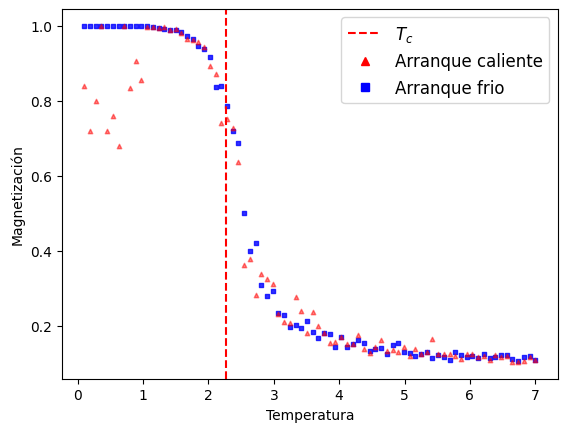

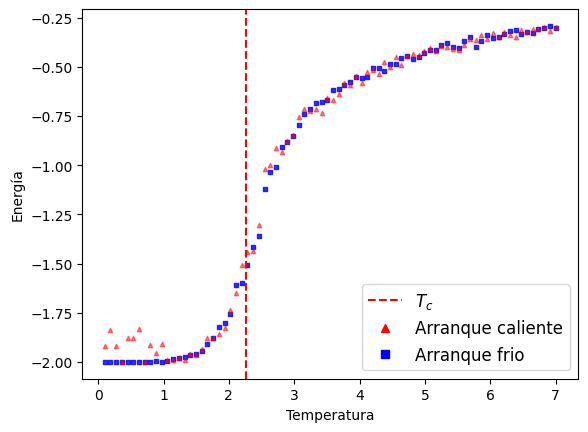

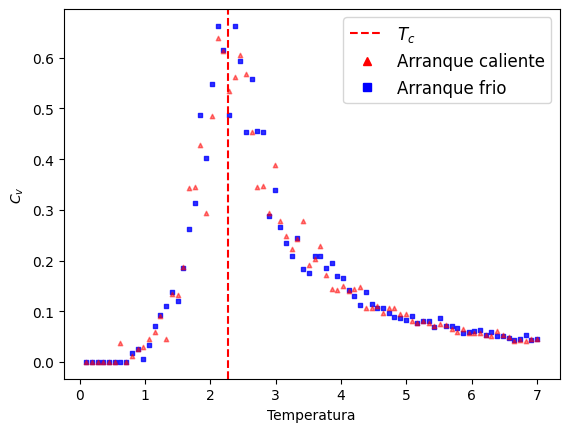

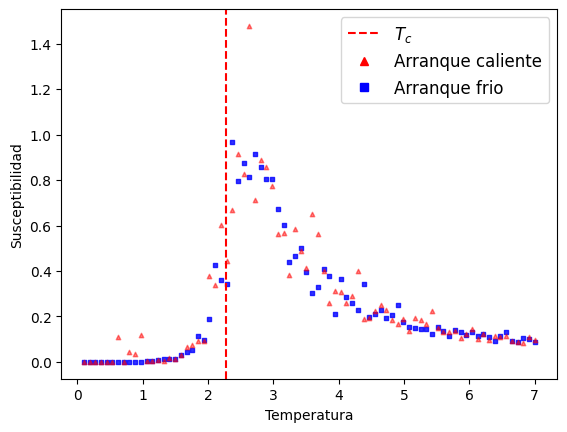

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
additional_legend_elements = [
    Line2D([0], [0], c = "red", marker = "^", linestyle='None', label='hot startup'),
    Line2D([0], [0], c = "blue", marker = "s", linestyle='None', label='cold startup')
]


plt.scatter(temperaturas, M_avg, s= 10, color = "blue", marker='s', alpha=0.8)
plt.scatter(temperaturas, M_avg_c, s= 10, color = "red", marker='^', alpha=0.5)
plt.xlabel("Temperature")
plt.ylabel("Magnetización")
x_value = 2.2692
plt.axvline(x=x_value, color='red', linestyle='--', label='$T_c$')
plt.legend(loc='best', fontsize=12)
# Add additional legend
plt.legend(handles=plt.gca().get_legend_handles_labels()[0] + additional_legend_elements, loc="best", fontsize=12)

plt.savefig("magnetizacion_caliente.pdf")
plt.show()

plt.scatter(temperaturas, E_avg, s= 10, color = "blue", marker='s', alpha=0.8)
plt.scatter(temperaturas, E_avg_c, s= 10, color = "red", marker='^', alpha=0.5)
plt.xlabel("Temperature")
plt.ylabel("Energía")
plt.axvline(x=x_value, color='red', linestyle='--', label='$T_c$')
plt.legend(loc='best', fontsize=12)
# Add additional legend
plt.legend(handles=plt.gca().get_legend_handles_labels()[0] + additional_legend_elements, loc="best", fontsize=12)
plt.savefig("energia_caliente.pdf")
plt.show()

plt.scatter(temperaturas, cv_avg, s= 10, color = "blue", marker='s', alpha=0.8)
plt.scatter(temperaturas, cv_avg_c, s= 10, color = "red", marker='^', alpha=0.5)
plt.xlabel("Temperature")
plt.ylabel("$C_v$")
plt.axvline(x=x_value, color='red', linestyle='--', label='$T_c$')
plt.legend(loc='best', fontsize=12)
# Add additional legend
plt.legend(handles=plt.gca().get_legend_handles_labels()[0] + additional_legend_elements, loc="best", fontsize=12)
plt.savefig("cv_caliente.pdf")
plt.show()

plt.scatter(temperaturas, suceptibilidad_avg, s= 10, color = "blue", marker='s', alpha=0.8)
plt.scatter(temperaturas, suceptibilidad_avg_c, s= 10, color = "red", marker='^', alpha=0.5)
plt.xlabel("Temperature")
plt.ylabel("Susceptibilidad")
plt.axvline(x=x_value, color='red', linestyle='--', label='$T_c$')
plt.legend(loc='best', fontsize=12)
# Add additional legend
plt.legend(handles=plt.gca().get_legend_handles_labels()[0] + additional_legend_elements, loc="best", fontsize=12)
plt.savefig("suceptibilidad_caliente.pdf")
plt.show()

##PART TWO: Ferromagnetic phase transition

###sub 1

Warning! To compile sections 2 and 3, it is necessary to comment out the energy calculation in the Metropolis function with a # to make execution faster, since sections 2 and 3 do not require energy.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


Tc = 2 / np.log(np.sqrt(2) + 1)  # Ttheoretical critical temperature
L= 30  # lattice size
#temps = Tc - 10.0**(-3) * np.arange(0, 101)  # Rango de temperaturas
#temps = temps[::-1]
temps = np.linspace(Tc - 0.5, Tc - 0.01, num=80)

mag_prom = []
for T in temps:
  mag_list = []
  for _ in range(10):
    # Running the Metropolis algorithm
    _, _, mag, _, _, _ = metropolis(L = 10,
                          J =  1,
                          H =  0,
                          beta =  1/T,
                          iteraciones =  10000,
                          TT = 8192,
                          arranque= 0) #startup: 0 -> cold | 1 -> hot
    mag_list.append(mag)
      #
  mag_prom.append(np.mean(mag_list))

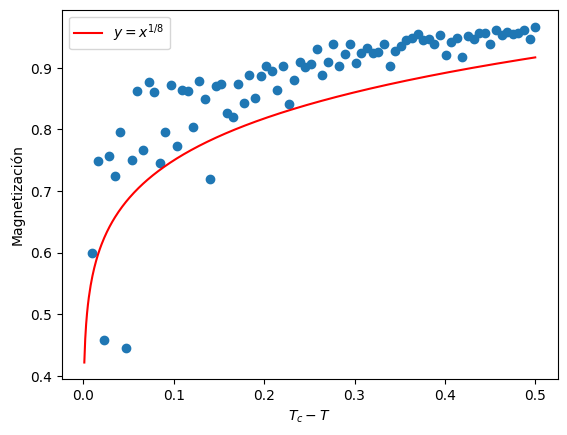

In [ ]:
# Generate values ​​for the curve y = x^{1/8}
x = np.linspace(0.001, max(Tc - temps), 500)  #
y = x**(1/8)

# Graph the curve
plt.plot(x, y, color='red', label=r"$y = x^{1/8}$")
plt.scatter(Tc - temps, mag_prom)
plt.xlabel("$T_c -T$")
plt.ylabel("Magnetization")
plt.legend()
plt.savefig("P2_2_1.pdf")
plt.show()

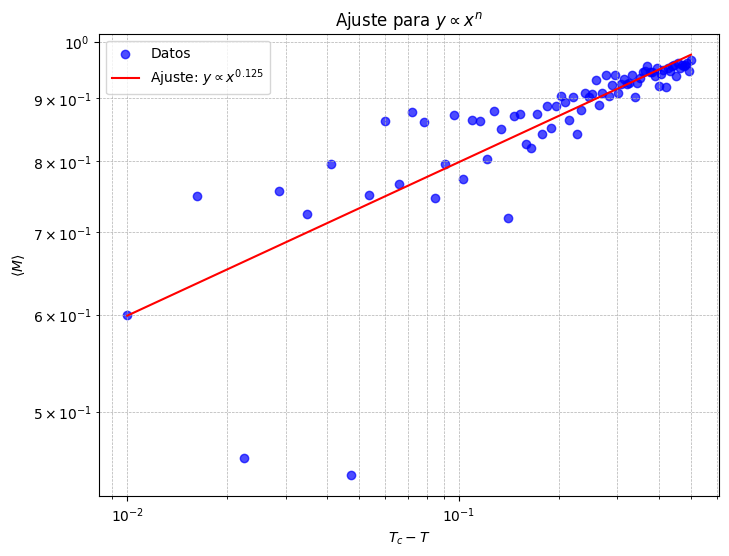

Exponente ajustado (n): 0.125


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Filter positive data to avoid problems with logarithms
valid_indices = (Tc - temps > 0) & (np.array(mag_prom) > 0)
x_fit = Tc - temps[valid_indices]
y_fit = np.array(mag_prom)[valid_indices]

# transformation log-log
log_x = np.log(x_fit)
log_y = np.log(y_fit)

# linear fit
coef = np.polyfit(log_x, log_y, 1)  # coef[0] is the slope, which corresponds to n
n = coef[0]

# Generate the fitted curve
x_plot = np.linspace(min(x_fit), max(x_fit), 500)
y_plot = np.exp(np.polyval(coef, np.log(x_plot)))

# Plotting original data and fitting
plt.figure(figsize=(8, 6))
plt.scatter(x_fit, y_fit, label='Datos', color='blue', alpha=0.7)
plt.plot(x_plot, y_plot, label=f'Ajuste: $y \\propto x^{{{n:.3f}}}$', color='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$T_c - T$')
plt.ylabel('$\\langle M \\rangle$')
plt.title('fit for  $y \\propto x^n$')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig("P2_2_2.pdf")
plt.show()

# Imprimir el valor de n
print(f"Exponente ajustado (n): {n:.3f}")


###sub 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


Tc = 2 / np.log(np.sqrt(2) + 1)  # Theoretical critical temperature
L= 30  # lattice size
#temps = Tc +0.1 - 5*10.0**(-3) * np.arange(0, 101)  # Rango de temperaturas
#temps = temps[::-1]
temps = np.linspace(Tc - 0.5, Tc - 0.01, num=120)



sus_prom = []
for T in temps:
  sus_list = []
  for _ in range(12):
    # Running the Metropolis algorithm
    _, _, _, _, _, sus = metropolis(L = 10,
                          J =  1,
                          H =  0,
                          beta =  1/T,
                          iteraciones =  10000,
                          TT = 8192,
                          arranque= 0) #startup: 0 -> cold | 1 -> hot
    sus_list.append(sus)
      #
  sus_prom.append(np.mean(sus_list))

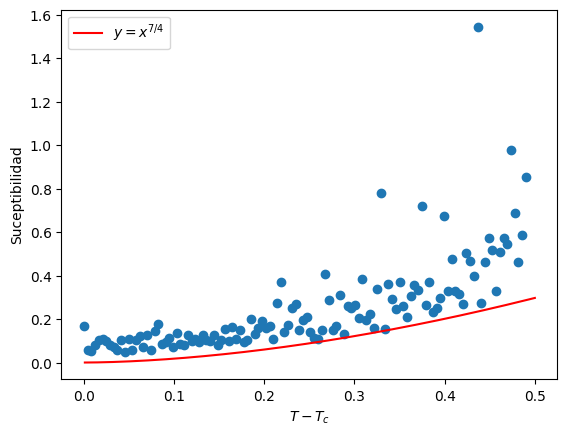

In [ ]:
x = np.linspace(0.001, max(Tc - temps), 500)  #
y = x**(7/4)

# Graficar la curva
plt.plot(x, y, color='red', label=r"$y = x^{7/4}$")

plt.scatter(temps-Tc+0.5, sus_prom)
plt.xlabel("$T-T_c$")
plt.ylabel("Suceptibilidad")
plt.legend()
plt.savefig("P2_3_1.pdf")
plt.show()

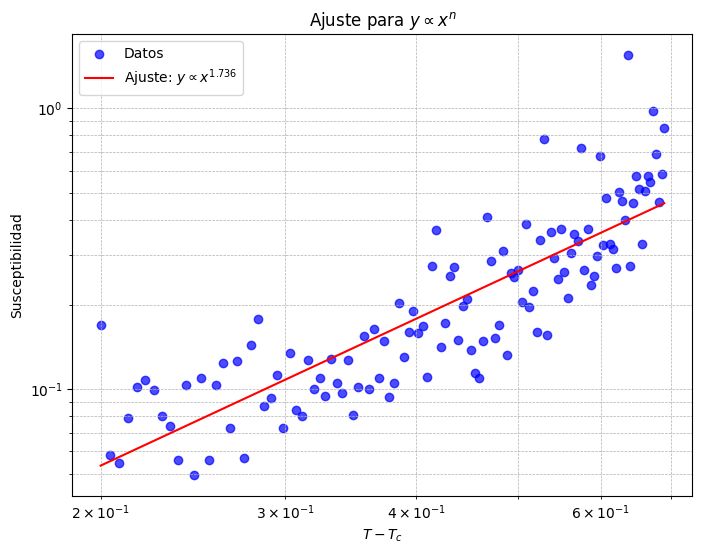

Exponente ajustado (n): 1.736


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate adjusted x (temps - Tc + 0.5)
x_data = temps - Tc +0.7
x_data = np.array(x_data)
sus_prom = np.array(sus_prom)
# Filter valid values ​​for adjustment
valid_indices = (x_data > 0) & (sus_prom > 0)
x_fit = x_data[valid_indices]
y_fit = sus_prom[valid_indices]

# Verify that there is sufficient valid data
if len(x_fit) == 0 or len(y_fit) == 0:
    raise ValueError("No hay suficientes puntos válidos después del filtro.")

# Tranformation log-log
log_x = np.log(x_fit)
log_y = np.log(y_fit)

# linear fit
coef = np.polyfit(log_x, log_y, 1)  # coef[0] es la pendiente (n)
n = coef[0]

# Generate the fitted curve
x_plot = np.linspace(min(x_fit), max(x_fit), 500)
y_plot = np.exp(np.polyval(coef, np.log(x_plot)))

# Graph the results
plt.figure(figsize=(8, 6))
plt.scatter(x_fit, y_fit, label='Datos', color='blue', alpha=0.7)
plt.plot(x_plot, y_plot, label=f'Ajuste: $y \\propto x^{{{n:.3f}}}$', color='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$T - T_c $')
plt.ylabel('Susceptibilidad')
plt.title('fit for $y \\propto x^n$')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig("P2_3_2.pdf")
plt.show()

# Print the value of n
print(f"Exponente ajustado (n): {n:.3f}")


##TESTS (ignore)

Visualizar la red

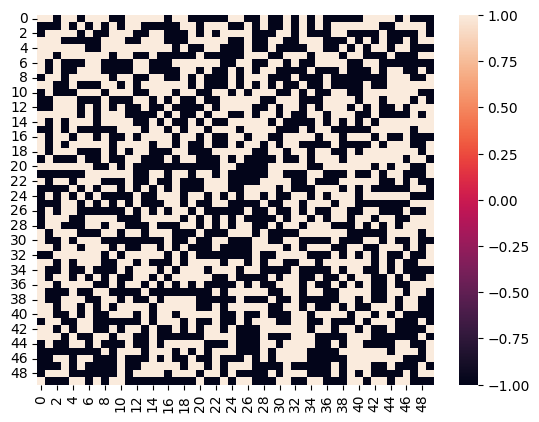

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

red1 = red_random(L = 50)
sns.heatmap(red1)
plt.show()

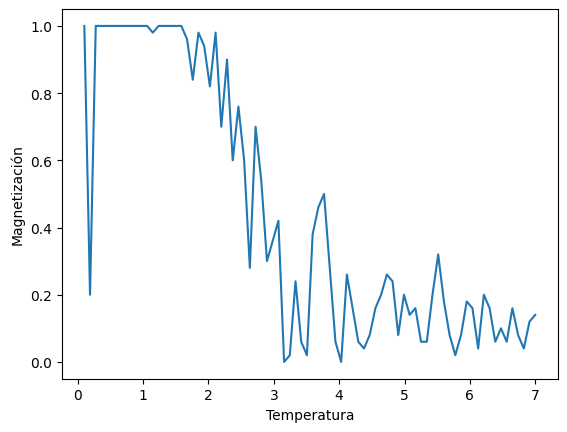

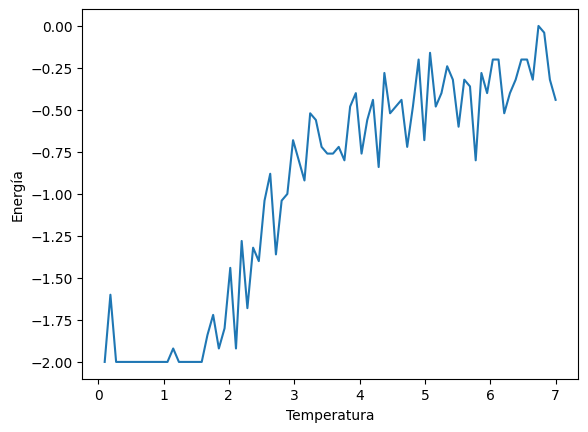

In [ ]:
temperaturas = np.linspace(0.1,7,80)
M = []
E = []

for T in temperaturas:
  red = metropolis(10, 1, 0, 1/T, 20000, 8930)
  M.append(magnetizacion(red[1]))
  E.append(energia(red[1], 1, 0))

plt.plot(temperaturas, M)
plt.xlabel("Temperatura")
plt.ylabel("Magnetización")
plt.show()

plt.plot(temperaturas, E)
plt.xlabel("Temperatura")
plt.ylabel("Energía")
plt.show()


In [ ]:
def metropolis2(L, J, H, beta, iteraciones):
    red = red_random(L)
    size = len(red)
    red_i = red.copy()

    for paso in range(iteraciones):
        # Selección aleatoria de un espín
        x = np.random.randint(0, size)
        y = np.random.randint(0, size)

        # Calcular ΔE localmente
        spin_actual = red[x, y]
        vecinos = red[(x+1)%size, y] + red[(x-1)%size, y] + red[x, (y+1)%size] + red[x, (y-1)%size]
        delta_E = 2*J*spin_actual*vecinos + 2*H*spin_actual

        # Aceptar o rechazar el cambio
        if delta_E < 0 or np.random.random() < np.exp(-beta * delta_E):
            red[x, y] = -spin_actual  # Aceptar cambio
        # Si no, el espín no se modifica (ya está como estaba)

    return red_i, red





In [ ]:
prueba = metropolis2(50, 1, 0, 2, 10000)

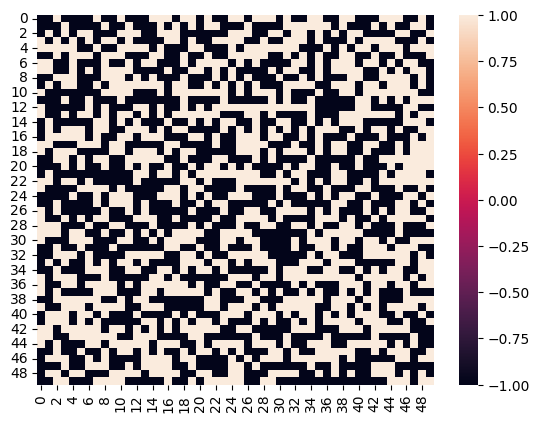

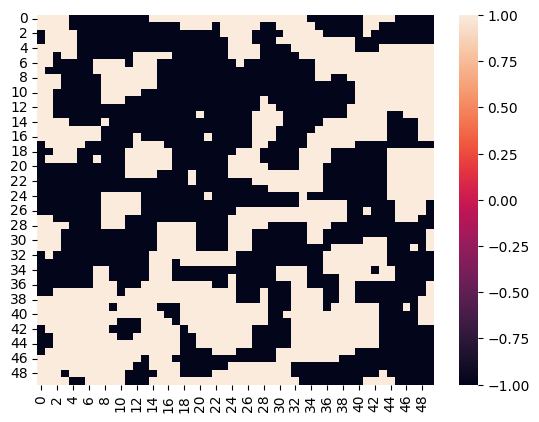

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(prueba[0])
plt.savefig("prueba0.pdf")
plt.show()
sns.heatmap(prueba[1])
plt.savefig("prueba3.pdf")
plt.show()

In [ ]:
# Promediar magnetización y energía
M_avg = []
E_avg = []

for T in temperaturas:
    magnetizaciones = []
    energias = []
    for _ in range(20):  # Realiza 10 simulaciones independientes
        red = metropolis2(10, 1, 0, 1/T, 8192)
        magnetizaciones.append(magnetizacion(red[1]))
        energias.append(energia(red[1], 1, 0))
    M_avg.append(np.mean(magnetizaciones))
    E_avg.append(np.mean(energias))
